In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter#, FixedLocatorfrom
from matplotlib import gridspec
import matplotlib.dates as mdates
import xarray as xr
import os
from datetime import datetime

In [3]:
files_path = "/Users/calebflaim/Documents/toAddToThesis/glider_dives"
dive_files = os.listdir(files_path)

science_vars = ["sea_water_density", "salinity", "temperature", "sea_water_sigma_t", "theta","time","depth","buoyancy", "absolute_salinity", "latitude_gsm", "longitude_gsm"]
# variables = [“density”, “salinity”, “temperature”, “sigma_t”, “theta”, “eng_depth”, “eng_vbdCC”,
#               “eng_elaps_t”, “absolute_salinity”, “latitude_gsm”, “longitude_gsm”, “density_insitu”, 
#               “buoyancy”, “depth”, “time”, “log_c_vbd”, 
#               “log_vbd_max”, “log_vbd_min”, “log_MAX_BUOY”, “sg_cal_volmax”]
print(dive_files)

['sg175_UWSSC_Mission_003-first_deployment_timeseries.nc', 'p1750009.nc', 'p1750008.nc', 'p1750007.nc', 'p1750003.nc', 'p1750002.nc', 'p1750006.nc', 'p1750001.nc', 'p1750005.nc', 'p1750004.nc']


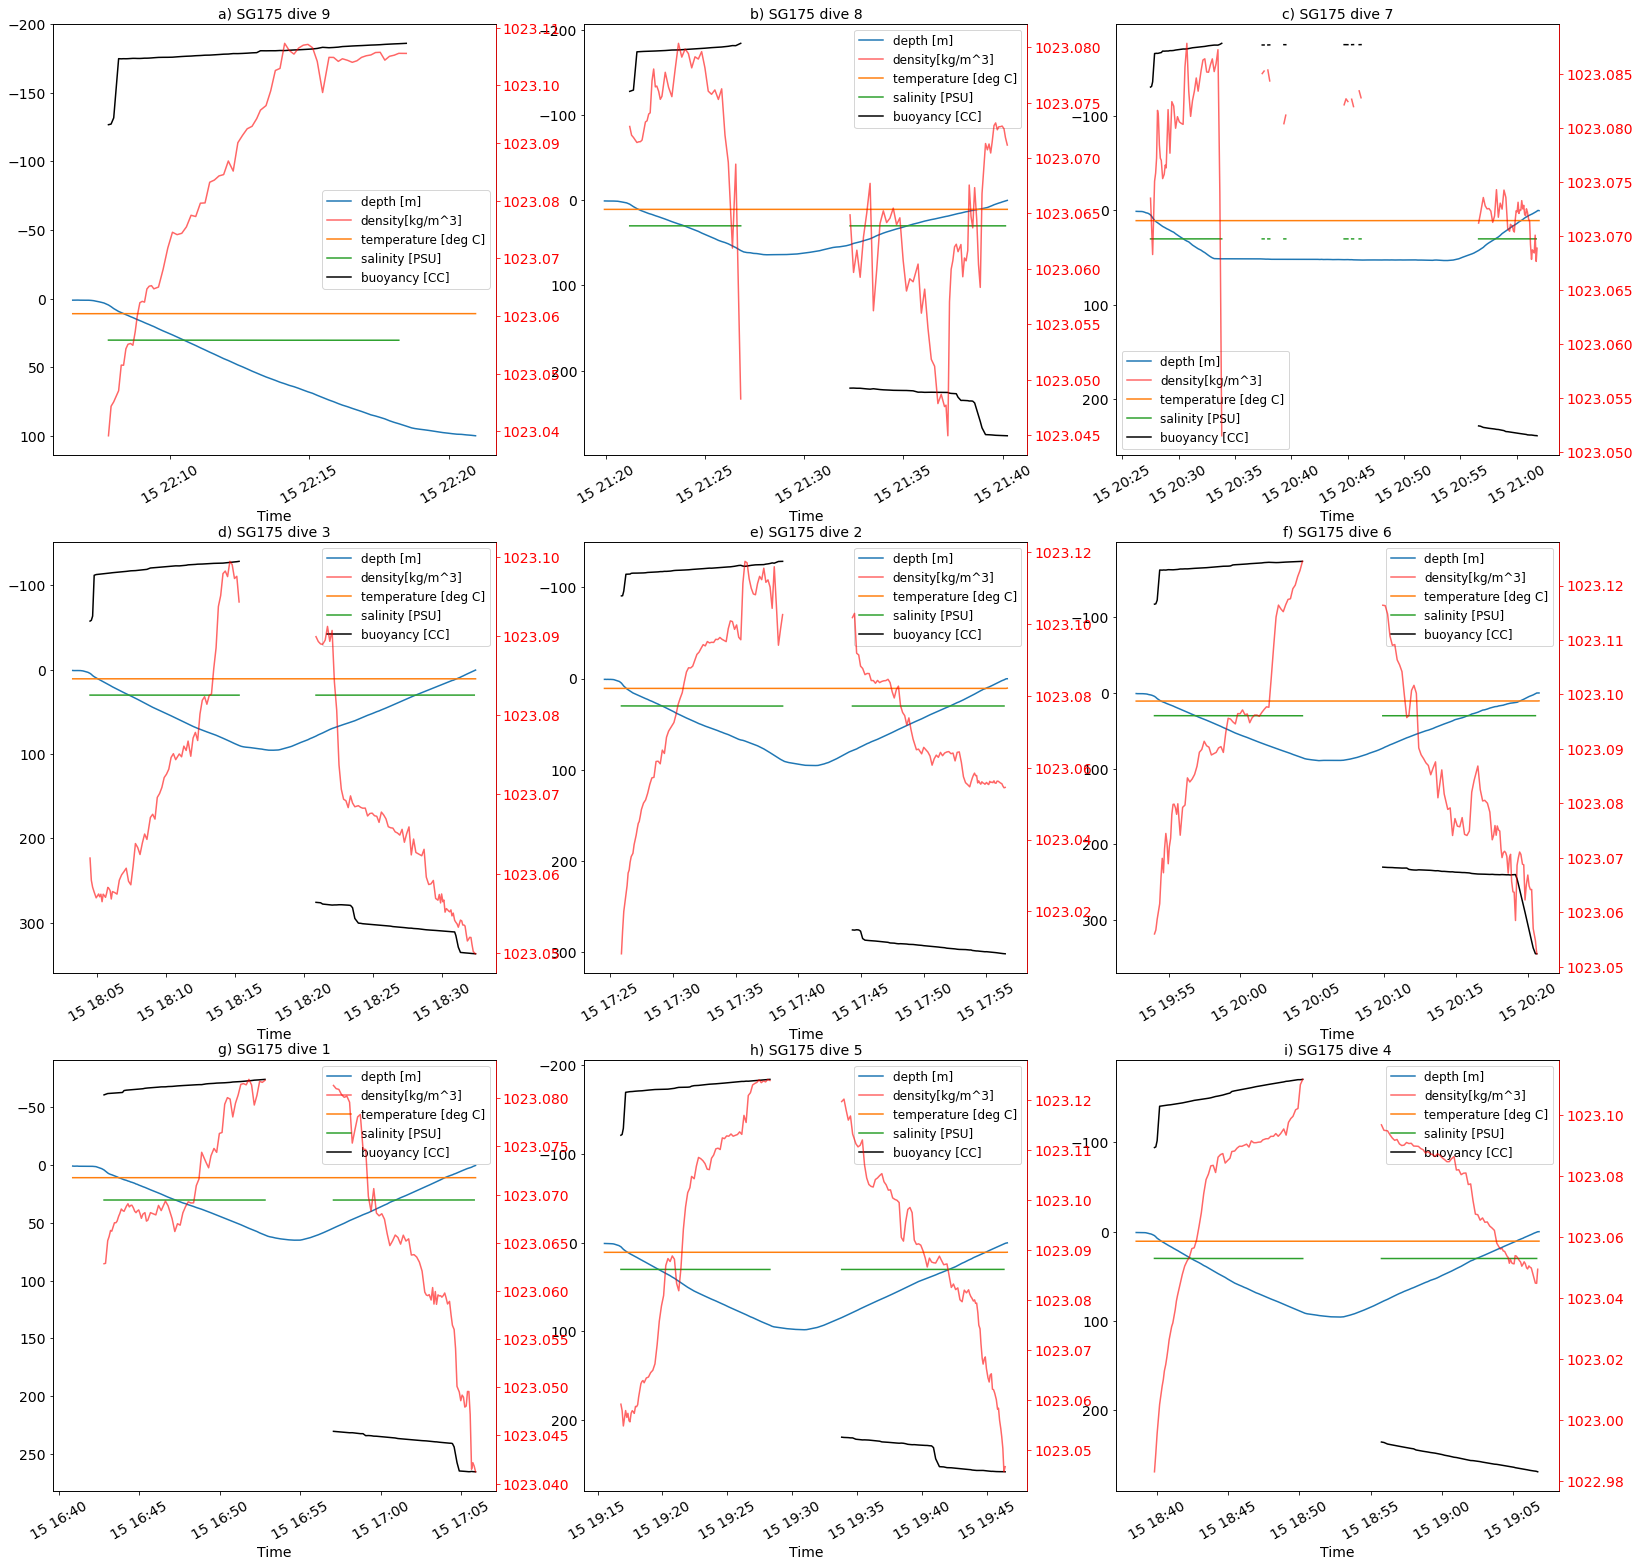

In [4]:
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(27,27))
scalar_formatter = ScalarFormatter(useOffset=False)
i=1
j = 'a'
plots = []
for file, ax in zip(dive_files[1:], axs.flat):
    data = xr.open_dataset(files_path + "/" + file)
    # display(data)

    # df = pd.DataFrame([data['temperature'], data['density'], data['pressure']], columns=['temp [deg C]', 'density g/m^3', 'pressure [dbar]'])
    # print(df)
    # df.to_csv(file[-3:]+".csv")
    
    y2 = ax.twinx()
    plots += ax.plot(data["time"], data["depth"], label="depth [m]")
    plots += y2.plot(data["time"], data["density"], label="density[kg/m^3]", c='red', alpha=0.6)
    plots += ax.plot(data["time"], data["temperature"], label="temperature [deg C]")
    plots += ax.plot(data["time"], data["salinity"], label = "salinity [PSU]")
    plots += ax.plot(data["time"], data["buoyancy"], c='k',label = "buoyancy [CC]")
    ax.invert_yaxis()

    ax.set_title(f"{j}) SG175 dive {dive_files[i][-4]}", fontsize=14)
    i+=1
    j = chr(ord(j) + 1)

    ax.set_xlabel("Time", fontsize=14)
    labels = [l.get_label() for l in plots]
    ax.legend(plots, labels, loc='best', fontsize=12)
    ax.tick_params(labelsize=14)
    y2.yaxis.set_major_formatter(scalar_formatter)
    y2.tick_params(labelsize=14)
    y2.spines['right'].set_color('red')
    y2.tick_params(axis='y', colors='red')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
    plots=[]
# plt.savefig("bigGraph.pdf")
plt.show()

In [5]:
i=1
for file in dive_files[1:]:
    data = xr.open_dataset(files_path + "/" + file)
    # display(data['density'].values)

    df = pd.DataFrame()
    df["time"] = data["time"].values
    df["temperature"] = data["temperature"].values
    df["density"] = data["density"].values
    df["pressure"] = data["pressure"].values
    df["absolute_salinity"] = data["absolute_salinity"].values

    # df = df.dropna()

    print(df)
    # df.to_csv("/Users/calebflaim/Documents/toAddToThesis/diveDataCsv/" + f"SG175_dive_{i}" + ".csv")

    i+=1

                            time  temperature  density    pressure  \
0  2023-12-15 22:06:31.544000000    10.924268      NaN    1.076991   
1  2023-12-15 22:06:36.816999936    10.923737      NaN    1.056861   
2  2023-12-15 22:06:42.788999936    10.923014      NaN    1.026665   
3  2023-12-15 22:06:48.063000064    10.922205      NaN    1.097122   
4  2023-12-15 22:06:53.361999872    10.922949      NaN    1.107187   
..                           ...          ...      ...         ...   
95 2023-12-15 22:20:16.862999808    10.880483      NaN   99.536137   
96 2023-12-15 22:20:26.884999936    10.879621      NaN   99.666986   
97 2023-12-15 22:20:36.868000000    10.880004      NaN  100.039404   
98 2023-12-15 22:20:46.869999872    10.880335      NaN  100.321233   
99 2023-12-15 22:20:56.864000000    10.880153      NaN  100.693651   

    absolute_salinity  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
..             

SG175_dive_6_sal_estimation.csv
SG175_dive_8_sal_estimation.csv
SG175_dive_5_sal_estimation.csv
SG175_dive_3_sal_estimation.csv
SG175_dive_1_sal_estimation.csv
SG175_dive_2_sal_estimation.csv
SG175_dive_9_sal_estimation.csv
SG175_dive_4_sal_estimation.csv
SG175_dive_7_sal_estimation.csv


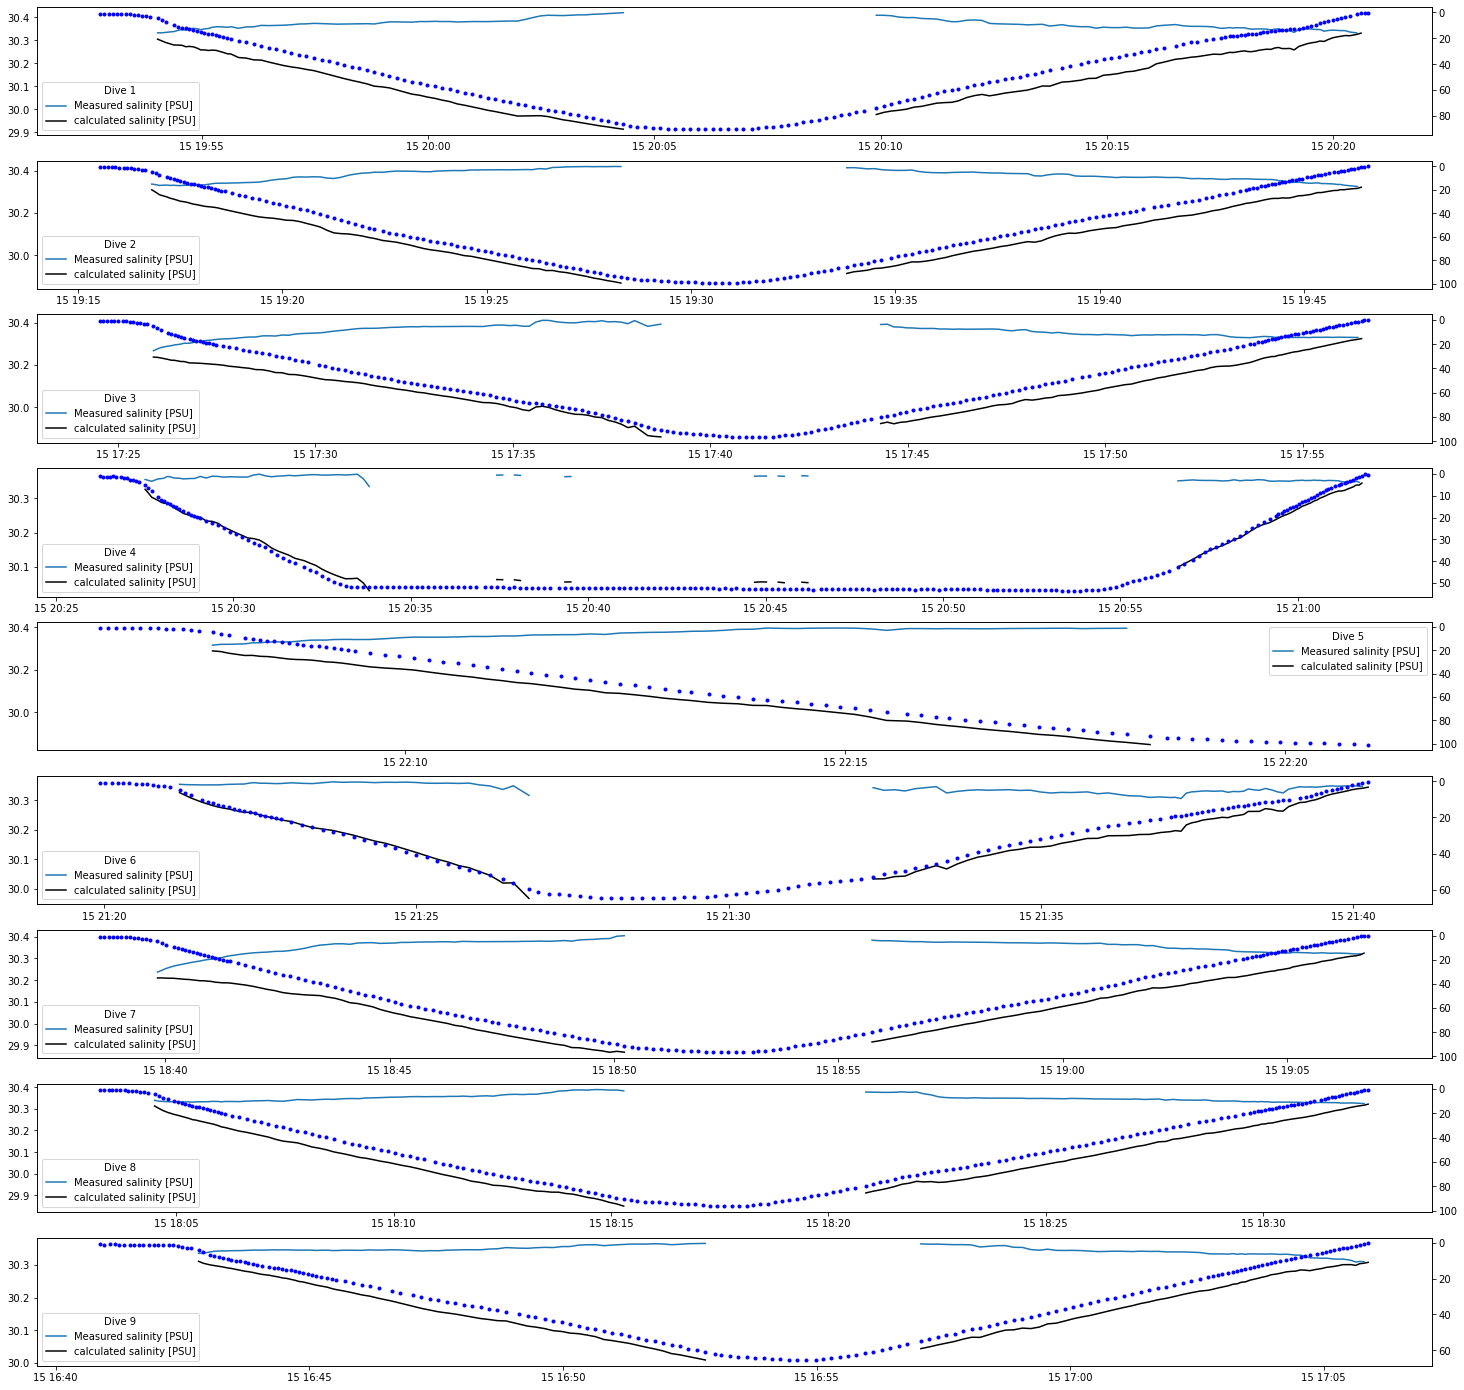

In [6]:
sal_est_read_path = "/Users/calebflaim/Documents/toAddToThesis/salinityEstimationVals/"
sal_est_files = os.listdir(sal_est_read_path); sal_est_files.pop(1)

press_read_path = "/Users/calebflaim/Documents/toAddToThesis/diveDataCsv/"
press_files = os.listdir(press_read_path)

fig, ax = plt.subplots(9, 1, figsize=(25, 25))
for i, file in enumerate(sal_est_files):
    print(file)
    df = pd.read_csv(sal_est_read_path+file)
    # df2 = pd.read_csv(press_read_path+press_files[i]).dropna()
    y2 = ax[i].twinx() 
    y2.invert_yaxis()
    # [datetime.strptime(df['time'][i], '%y-%m-%d %H:%M:%S.%f') for i in range(len(df['time']))]
    df['time'] = pd.to_datetime(df['time'])
    ax[i].plot(df["time"], df["absolute_salinity"], label="Measured salinity [PSU]")
    ax[i].plot(df["time"], df["calculated_sal"], c = 'k', label="calculated salinity [PSU]")
    y2.scatter(df["time"], df["pressure"], c = 'b', marker='.',label="depth [dbar]")
    # ax[i].plot(df['time'], df2['pressure'], c='g', label='pressure')
    ax[i].legend(title=f"Dive {i+1}")

    # labels = [l.get_label() for l in plots]
    # print(df)

plt.show()

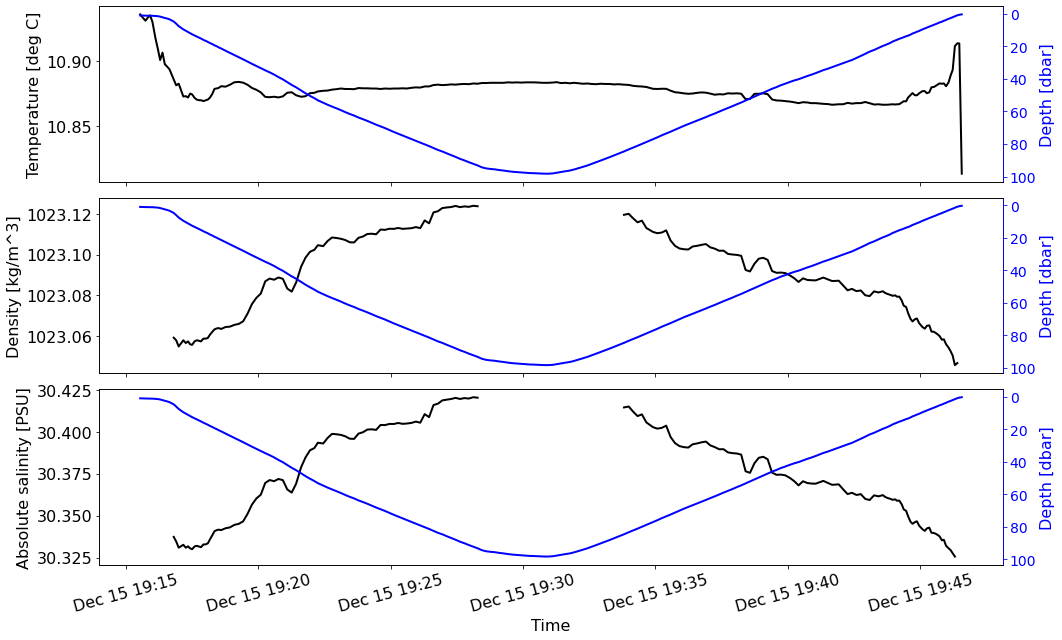

In [7]:
fig, axs = plt.subplots(3, 1, figsize =  (15, 9), sharex=True)

file_path = "/Users/calebflaim/Documents/toAddToThesis/glider_dives/p1750005.nc"
vars_to_plot = ["temperature", "density", "absolute_salinity"]
ylabels = ["Temperature", "Density", "Absolute salinity"]
letters = ["a)", "b)", "c)"]
units = ['[deg C]', "[kg/m^3]", "[PSU]"]
data = xr.open_dataset(file_path)
# display(dive5)

fontsize = 16
scalar_formatter = ScalarFormatter(useOffset=False)

for i, ax in enumerate(axs):
    plots = []
    y2 = ax.twinx()
    y2.invert_yaxis()

    plots += ax.plot(data["time"], data[vars_to_plot[i]], linewidth=2, c='k', label = vars_to_plot[i])
    plots += y2.plot(data["time"], data["depth"], linewidth=2, c='b', label = "depth")

    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.yaxis.set_major_formatter(scalar_formatter)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M:s'))
    if i == 2:
        ax.set_xlabel("Time", fontsize=fontsize)
    ax.set_ylabel(ylabels[i] + " " + units[i], fontsize=fontsize)
    # ax.set_title(letters[i])

    y2.tick_params(labelsize=14)
    y2.spines['right'].set_color('b')
    y2.tick_params(axis='y', colors='b')
    y2.set_ylabel("Depth [dbar]", c='b', fontsize=fontsize)

    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

    # labels = [l.get_label() for l in plots]

    # ax.legend(plots, labels, fontsize = 14)

plt.tight_layout()
plt.show()

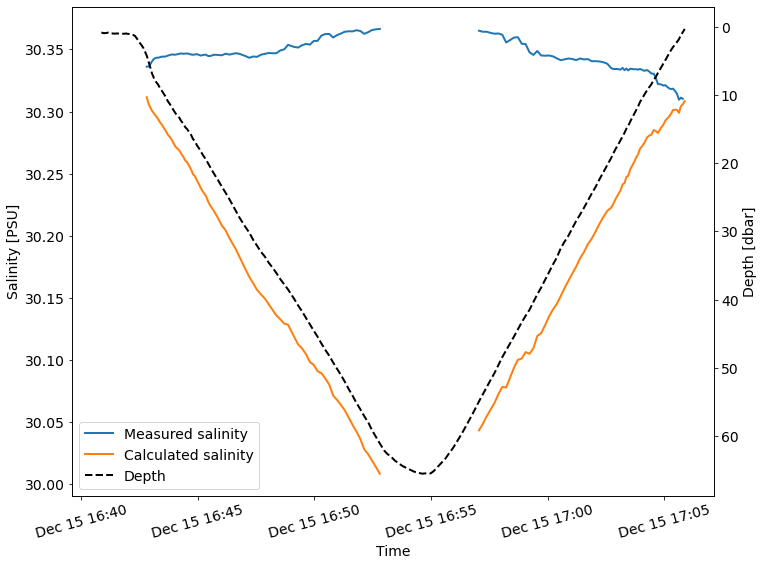

In [8]:
fig, ax = plt.subplots(figsize =  (11.5, 9))
path = "/Users/calebflaim/Documents/toAddToThesis/salinityEstimationVals/SG175_dive_5_sal_estimation.csv"

plots = []
df = pd.read_csv(sal_est_read_path+file)
# df2 = pd.read_csv(press_read_path+press_files[i]).dropna()
y2 = ax.twinx() 
y2.invert_yaxis()

# [datetime.strptime(df['time'][i], '%y-%m-%d %H:%M:%S.%f') for i in range(len(df['time']))]
df['time'] = pd.to_datetime(df['time'])
plots += ax.plot(df["time"], df["absolute_salinity"], linewidth=2,label="Measured salinity")
plots += ax.plot(df["time"], df["calculated_sal"], linewidth=2, label="Calculated salinity")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(labelsize=14)

ax.set_ylabel("Salinity [PSU]", fontsize = 14)
ax.set_xlabel("Time", fontsize = 14)


plots += y2.plot(df["time"], df["pressure"], linewidth=2, c = 'k', linestyle="--",label="Depth")
y2.tick_params(labelsize=14)
y2.spines['right'].set_color('k')
y2.tick_params(axis='y', colors='k')
y2.set_ylabel("Depth [dbar]", c='k', fontsize=14)

# ax.legend(fontsize=14)
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, fontsize = 14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
for tick in ax.get_xticklabels():
    tick.set_rotation(15)

# labels = [l.get_label() for l in plots]
# print(df)

plt.show()

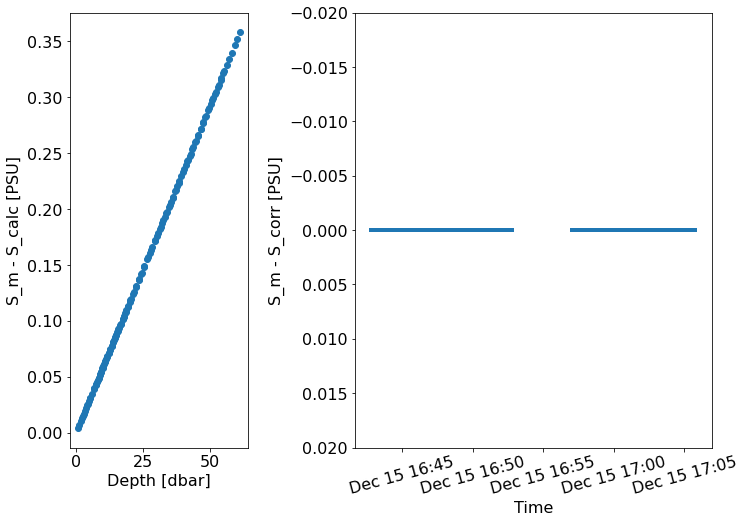

In [9]:
path = "/Users/calebflaim/Documents/toAddToThesis/salinityEstimationVals/SG175_dive_5_sal_estimation.csv"
plots = []
df = pd.read_csv(sal_est_read_path+file)
df['time'] = pd.to_datetime(df['time'])

sal_corection = df["absolute_salinity"] - df["calculated_sal"]

fig, axs = plt.subplots(1,2, figsize=(11.5, 8), gridspec_kw={
                           'width_ratios': [2, 4],
                           'height_ratios': [3],
                       'wspace': 0.4,
                       'hspace': 0.4})

axs[0].scatter(df['pressure'], sal_corection)
axs[0].set_ylabel("S_m - S_calc [PSU]", fontsize=fontsize)
axs[0].set_xlabel("Depth [dbar]",fontsize=fontsize)
axs[0].tick_params(labelsize=16)

corrected_sal = df['calculated_sal'] + sal_corection
# axs[1].plot(df['time'], sal_corection, label = "Salinity correction")
axs[1].plot(df['time'],  df['absolute_salinity']-corrected_sal, linewidth=4,label= "Correct salinity")
axs[1].set_ylim([0.02, -0.02])
axs[1].set_ylabel("S_m - S_corr [PSU]",  fontsize=fontsize)
axs[1].set_xlabel("Time", fontsize=fontsize)
axs[1].tick_params(labelsize=16)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
for tick in axs[1].get_xticklabels():
    tick.set_rotation(15)



In [10]:
##THird plot be deviation of calculated sal from pressure
## do with CTD data and ARGO

In [11]:
ctd_load_path = "/Users/calebflaim/Documents/toAddToThesis/ExoSondeCtdCastsDec15.csv"
# ctd_file_name = "Kor_Measurement_File_Export_-_121523163205.csv"

# file = ctd_load_path+ctd_file_name
ctd_data = pd.read_csv(ctd_load_path, usecols = [],skiprows=9)

print(ctd_data.head(100))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 809: invalid start byte

In [15]:
path = "/Users/calebflaim/Downloads/0498 8500 DD19 04-20240122 155752.csv"
df = pd.read_csv(path, skiprows=20)
df['time'] = pd.to_datetime(df['time'])


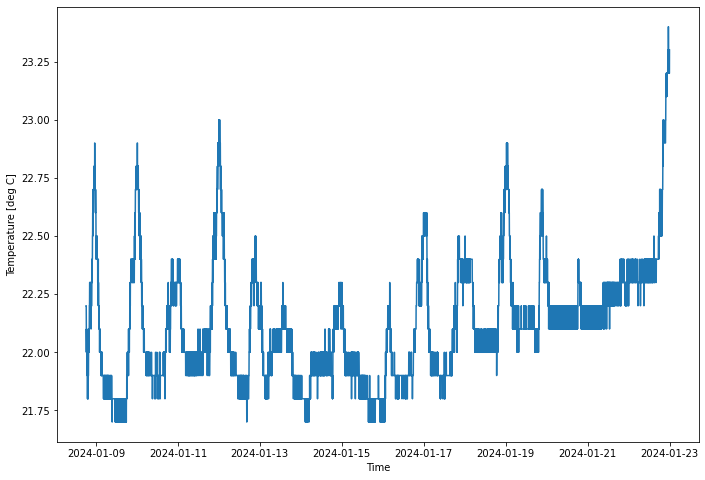

In [18]:
_, ax = plt.subplots(figsize=(11.5, 8))
ax.plot(df['time'], df['temp'])
ax.set_xlabel("Time")
ax.set_ylabel("Temperature [deg C]")
plt.show()